# Drawing points part 1: major and basic functions


In this tutorial, I will show you how to draw point maps from point shapefile data. 

The data is a set of major stations in Tokyo.  
An administrative boundary (polygon) shapefile will be used as the background. 

The most basic, most frequently used functions for mapping point shapefile is covered in this tutorial.

1. mpoint.prepare_map: just same as mpoly.prepare_map
2. mpoint.map_scatter: drawing all points with one simple marker (default='.'), which marker can also be customized using the markerset, and other matplotlib markers ('s' for square, etc.)
3. markerset.(list_icon_sets, list_icon_names, show_icon, get_marker): these functions are provided for choosing/showing/getting the markers before drawing them to map
4. drawing poitns with the markers get from the markerset
5. mpoint.map_category: drawing points according to a column of category (and use marker_order, colour_order, size_order to assign the marker design)
6. mpoint.map_colour: map points according to a column of colour
7. mpoint.map_size: map points according to a column of size, with a size_scale to set the size scale

## start mapping 

### preparation: import modules, reading files, projections, prepare map

In [37]:
import geopandas as gpd # read and manage attribute table data
import matplotlib.pyplot as plt # prepare the figure
import colouringmap.mapping_point as mpoint # for drawing points
import colouringmap.mapping_polygon as mpoly # for mapping background polygon
import colouringmap.markerset as ms # getting more marker icons

from random import random # just for creating a random colour for demonstration

# the projection of the map, the data is in wgs84(epsg:4326), so need a proj dict for conversion
proj = {u'lon_0': 138, u'ellps': u'WGS84', u'y_0': 0, u'no_defs': True, u'proj': u'eqdc', u'x_0': 0, u'units': u'm', u'lat_2': 40, u'lat_1': 34, u'lat_0': 0}

## magic line for matplotlib
%matplotlib inline

the file contain some major railway stations. 

read the shapefile and take a look.

In [53]:
stations = gpd.read_file('data/tweets_hotspot_station.shp')

In [54]:
stations.head()

,Company,DistanceBe,Distance_F,Line,Station,Station_1,accuracy,geometry,latitude,longitude,returned_a,status_cod
0,Tokyo Metro,1.1,0,Marunouchi,M-17,T?ky?,3,POINT (139.766084 35.681382),35.681382,139.766084,"Tokyo Station, 1 Chome-9 Marunouchi, Chiyoda, ...",200
1,Tokyo Metro,0.4,0,Hibiya,H-08,Ginza,3,POINT (139.763965 35.671989),35.671989,139.763965,"Ginza Station, 5 Chome-5 Ginza, Chuo, Tokyo, J...",200
2,Toei,1.1,0,?edo,E-23,Roppongi,3,POINT (139.731443 35.662836),35.662836,139.731443,"Roppongi Station, 6 Chome-1 Roppongi, Minato, ...",200
3,Tokyo Metro,0.9,0,Fukutoshin,F-09,Ikebukuro,3,POINT (139.71038 35.728926),35.728926,139.710380,"Ikebukuro Station, 1 Chome-1 Nishiikebukuro, T...",200
4,Toei,0.6,0,?edo,E-27,Shinjuku,3,POINT (139.700258 35.690921),35.690921,139.700258,"Shinjuku Station, 3 Chome-38 Shinjuku, Tokyo, ...",200


In [55]:
stations.crs

{'init': u'epsg:4326'}

Tthe projection of the file is epsg:4326, which is the latitude and longitude. So, lets project them to a projected crs.

In [56]:
stations = stations.to_crs(proj)

And now read the borders file, and do the projection.

In [5]:
borders = gpd.read_file('data/tokyo_special_ward.shp')
borders.head()

,CC_1,CC_2,ENGTYPE4,ENGTYPE_1,ENGTYPE_2,ENGTYPE_3,ENGTYPE_4,ENGTYPE_5,HASC_1,HASC_2,...,VALIDFR_4,VALIDTO_1,VALIDTO_2,VALIDTO_3,VALIDTO_4,VARNAME_1,VARNAME_2,VARNAME_3,VARNAME_4,geometry
0,None,None,None,Metropolis,Special Ward,None,None,None,JP.TK,None,...,None,Unknown,Present,None,Unknown,Edo|Yedo|Tokio|T┼uio,None,None,None,(POLYGON ((139.7594604492192 35.61920547485357...
1,None,None,None,Metropolis,Special Ward,None,None,None,JP.TK,None,...,None,Unknown,Present,None,Unknown,Edo|Yedo|Tokio|T┼uio,None,None,None,"(POLYGON ((139.756988525391 35.61753082275391,..."
2,None,None,None,Metropolis,Special Ward,None,None,None,JP.TK,None,...,None,Unknown,Present,None,Unknown,Edo|Yedo|Tokio|T┼uio,None,None,None,"POLYGON ((139.6250152587891 35.76376342773449,..."
3,None,None,None,Metropolis,Special Ward,None,None,None,JP.TK,None,...,None,Unknown,Present,None,Unknown,Edo|Yedo|Tokio|T┼uio,None,None,None,"POLYGON ((139.6917114257814 35.68527603149425,..."
4,None,None,None,Metropolis,Special Ward,None,None,None,JP.TK,None,...,None,Unknown,Present,None,Unknown,Edo|Yedo|Tokio|T┼uio,None,None,None,"(POLYGON ((139.7405700683598 35.5415992736817,..."


In [6]:
borders = borders.to_crs(proj) # convert the borders projection to the same as the stations
print borders.crs==stations.crs # now check again if the two shapefile have the same projection

True


Now they are projected and have the same projection.

Lets, prepare the map with the borders file as a background: use mpoly.map_shape.

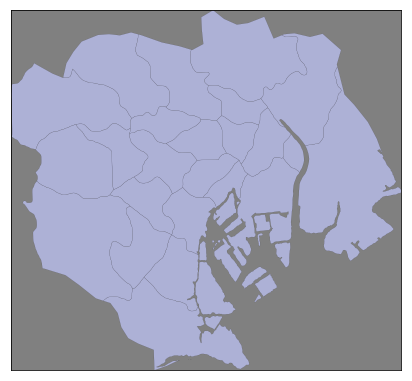

In [7]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoint.prepare_map(ax, map_context=borders, background_colour='grey')
ax = mpoly.map_shape(borders, ax, lw=.1, alpha=.7, fc='#c1c6fc')

And, first try: map them using default settings with mpoint.map_scatter, which default to dot (marker='.')

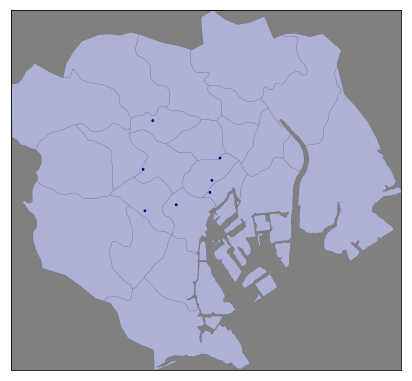

In [8]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoint.prepare_map(ax, map_context=borders, background_colour='grey')
ax = mpoly.map_shape(borders, ax, lw=.1, alpha=.7, fc='#c1c6fc')
ax = mpoint.map_scatter(stations, ax, extend_context=False)

Try to change the marker with a circle (marker='o'), and change to red colour.

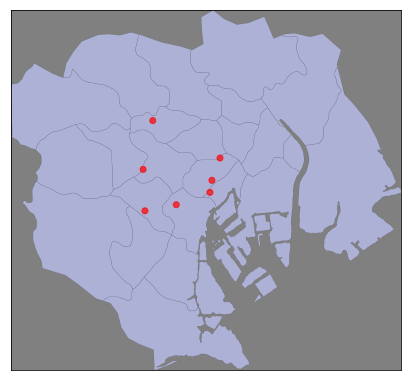

In [9]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoint.prepare_map(ax, map_context=borders, background_colour='grey')
ax = mpoly.map_shape(borders, ax, lw=.1, alpha=.7, fc='#c1c6fc')
ax = mpoint.map_scatter(stations, ax, extend_context=False, 
                        marker='o', size=36, facecolor='red', alpha=.7)

And, change to square.

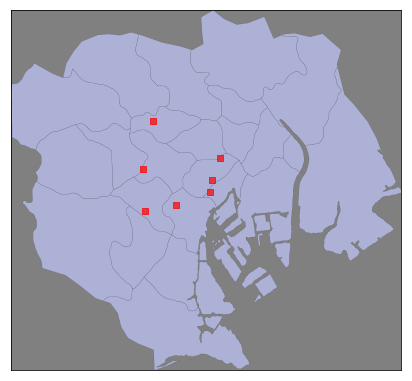

In [10]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoint.prepare_map(ax, map_context=borders, background_colour='grey')
ax = mpoly.map_shape(borders, ax, lw=.1, alpha=.7, fc='#c1c6fc')
ax = mpoint.map_scatter(stations, ax, extend_context=False, 
                        marker='s', size=36, facecolor='red', alpha=.7)

## get  some special icon as the marker come with the colouringmap

colouringmap package has included some font icons, which included maki (by mapbox) and so on...

to get a list of the icon_sets:

In [11]:
print ms.list_icon_sets()

['brandico', 'elusive', 'entypo', 'fontawesome', 'fontelico', 'iconic', 'linecons', 'maki', 'meteocons', 'modernpics', 'typicons', 'weathercons', 'zocial']


to get a list of the icon in an icon set:

In [12]:
print ms.list_icon_names('maki')
print ms.list_icon_names('linecons')

['aboveground-rail', 'airfield', 'airport', 'art-gallery', 'bar', 'baseball', 'basketball', 'beer', 'belowground-rail', 'bicycle', 'bus', 'cafe', 'campsite', 'cemetery', 'cinema', 'college', 'commerical-building', 'credit-card', 'cricket', 'embassy', 'fast-food', 'ferry', 'fire-station', 'football', 'fuel', 'garden', 'giraffe', 'golf', 'grocery-store', 'harbor', 'heliport', 'hospital', 'industrial-building', 'library', 'lodging', 'london-underground', 'minefield', 'monument', 'museum', 'pharmacy', 'pitch', 'police', 'post', 'prison', 'rail', 'religious-christian', 'religious-islam', 'religious-jewish', 'restaurant', 'roadblock', 'school', 'shop', 'skiing', 'soccer', 'swimming', 'tennis', 'theatre', 'toilet', 'town-hall', 'trash', 'tree-1', 'tree-2', 'warehouse']
['attach', 'beaker', 'calendar', 'camera', 'cd', 'clock', 'cloud', 'cog', 'comment', 'cup', 'database', 'desktop', 'diamond', 'doc', 'eye', 'fire', 'food', 'globe', 'graduation-cap', 'heart', 'inbox', 'key', 'lightbulb', 'locat

to get an icon from the sets and names:

In [13]:
rail_icon = ms.get_marker('maki', 'rail')
shop_icon = ms.get_marker('linecons', 'shop')

The above xxx_icon will be used as the marker for mapping.

You can also use ms.show_icon() to take a look at the chosen icon.

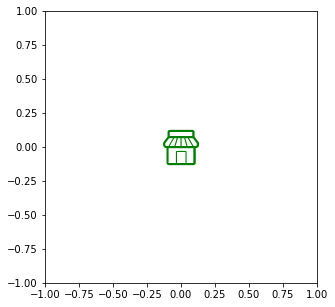

In [19]:
ms.show_icon(shop_icon, size=36, face_colour='green')

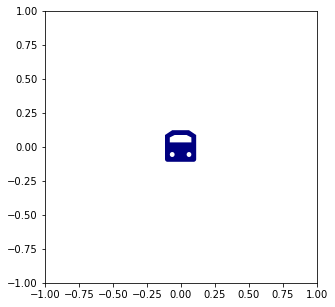

In [17]:
ms.show_icon(rail_icon, size=48)

## map the points using the special icons

just similar with the previous map_scatter, but change the marker to the show_icon/rail_icon.

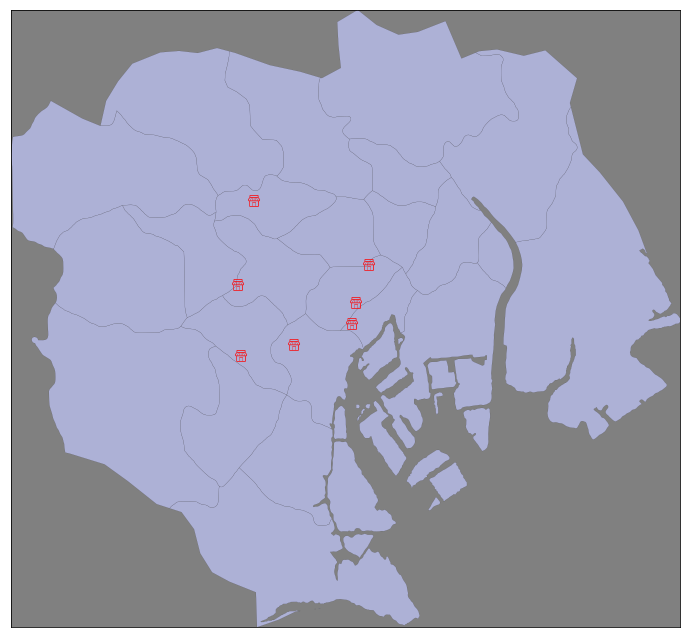

In [23]:
fig,ax = plt.subplots(figsize=(12,12))
ax = mpoint.prepare_map(ax, map_context=borders, background_colour='grey')
ax = mpoly.map_shape(borders, ax, lw=.1, alpha=.7, fc='#c1c6fc')
ax = mpoint.map_scatter(stations, ax, extend_context=False, 
                        marker=shop_icon, size=12, facecolor='red', alpha=.9)

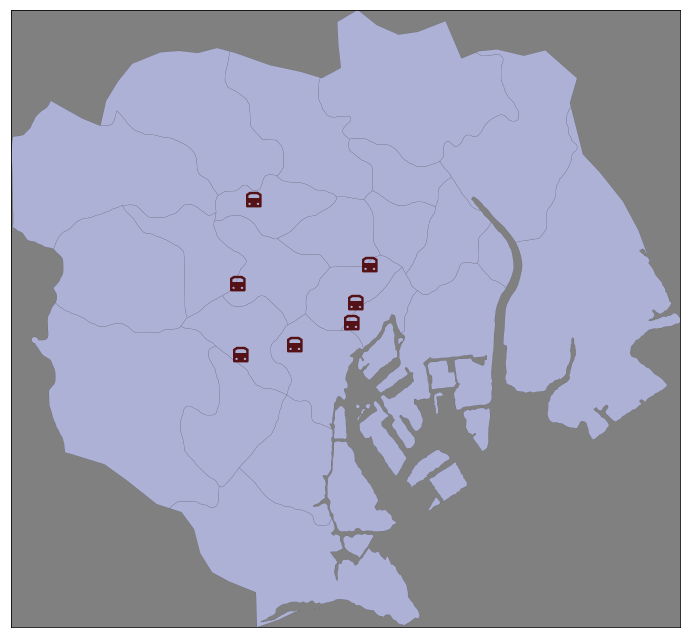

In [28]:
fig,ax = plt.subplots(figsize=(12,12))
ax = mpoint.prepare_map(ax, map_context=borders, background_colour='grey')
ax = mpoly.map_shape(borders, ax, lw=.1, alpha=.7, fc='#c1c6fc')
ax = mpoint.map_scatter(stations, ax, extend_context=False, 
                        marker=rail_icon, size=24, facecolor='#4b0101', alpha=.9)

## map the points according to a column of category

Sometimes, there are different types of points in a shapefile that you want to draw with different marker shapes, for differentiating them. 

One way to do this, is create a temporally geodataframe, with distincted category, and map them with two lines of codes. 

colouringmap provided another function named mpoint.map_category, which do the above procedures automatically for you. What you need to do is, provide a list of categories that you want to map (cat_order), and their style (marker_order, size_order, colour_order) in the same sequence. 

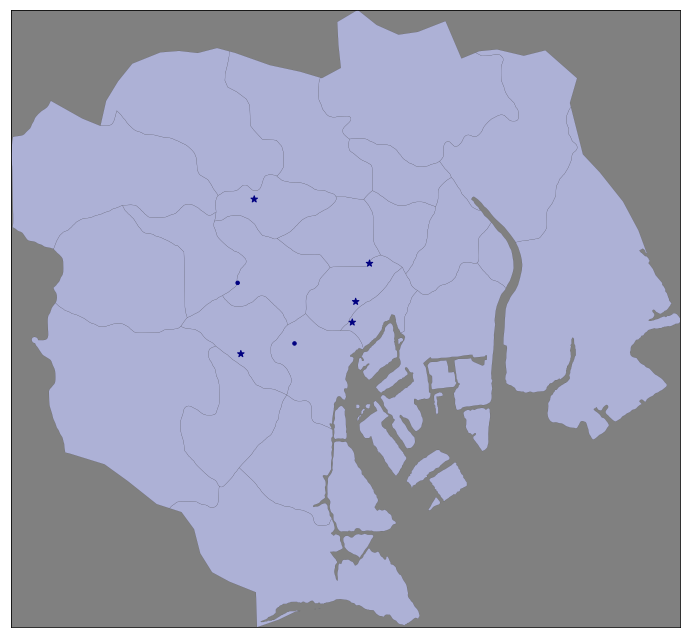

In [29]:
fig,ax = plt.subplots(figsize=(12,12))
ax = mpoint.prepare_map(ax, map_context=borders, background_colour='grey')
ax = mpoly.map_shape(borders, ax, lw=.1, alpha=.7, fc='#c1c6fc')
ax = mpoint.map_category(stations,'Company', ax, size=48, extend_context=False)

By default, map_category function will use some default markers for the different categories. 

The following show how to use different sets of styles for each category.

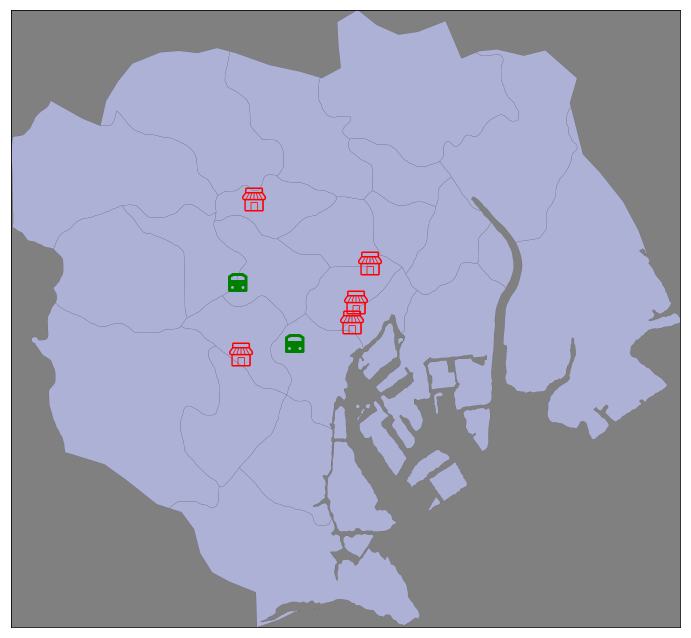

In [58]:
fig,ax = plt.subplots(figsize=(12,12))
ax = mpoint.prepare_map(ax, map_context=borders, background_colour='grey')
ax = mpoly.map_shape(borders, ax, lw=.1, alpha=.7, fc='#c1c6fc')
ax = mpoint.map_category(stations,'Company', ax, size=28, extend_context=False, 
                         cat_order=['Tokyo Metro', 'Toei'], # category order
                         marker_order=[shop_icon, rail_icon], 
                         size_order=[24,30], 
                         colour_order=['r', 'g'])

## colouring the points using different colour 

The following demonstrate how to use map_colour to change the colour of the points according to a column that contain the colour info.

In this tutorial, I will just create some random colour for each point. The matplotlib rgb color is a set of three 0.0-1.0 float numbers. 

In [38]:
col_list = []
for i in range(len(stations)):
    r = random()
    g = random()
    b = random()
    col_list.append((r,g,b))
stations['color'] = col_list

Now, map the points using the 'color' column.

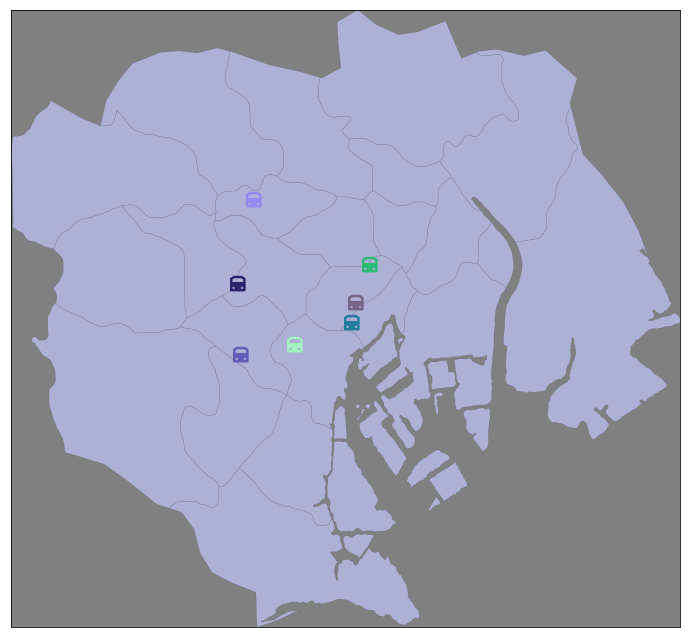

In [39]:
fig,ax = plt.subplots(figsize=(12,12))
ax = mpoint.prepare_map(ax, map_context=borders, background_colour='grey')
ax = mpoly.map_shape(borders, ax, lw=.1, alpha=.7, fc='#c1c6fc')
ax = mpoint.map_colour(stations, 'color', ax, extend_context=False, 
                        marker=rail_icon, size=24,alpha=.9)

## varying the sizes of the points according to a column with a size number 


The following tutorial show how to specify the size for each point, using a column. 

The numbers in the column is intended to be used directly as a size. Well, this can also use as the proportional size for a variable. 

To make a map with points using sizes that represent the breaking level, see another tutorial (part 2). 


Let say we want to change the size of the points according to a column named 'DistanceBe'.

In [50]:
stemp = stations['DistanceBe'].tolist()
stemp2 = [ float(s)*20 for s in stemp ]
stations['size2'] = stemp2
stations['DistanceBe2'] = [ float(s) for s in stemp ]

In [52]:
stations.head()

,Company,DistanceBe,Distance_F,Line,Station,Station_1,accuracy,geometry,latitude,longitude,returned_a,status_cod,color,size2,DistanceBe2
0,Tokyo Metro,1.1,0,Marunouchi,M-17,T?ky?,3,POINT (159691.5133803404 3951670.623890826),35.681382,139.766084,"Tokyo Station, 1 Chome-9 Marunouchi, Chiyoda, ...",200,"(0.444911220838, 0.349381112688, 0.482133079545)",22.0,1.1
1,Tokyo Metro,0.4,0,Hibiya,H-08,Ginza,3,POINT (159519.2326065602 3950625.070328603),35.671989,139.763965,"Ginza Station, 5 Chome-5 Ginza, Chuo, Tokyo, J...",200,"(0.0781162686484, 0.464822463947, 0.590396348401)",8.0,0.4
2,Toei,1.1,0,?edo,E-23,Roppongi,3,POINT (156596.9837281724 3949555.721272217),35.662836,139.731443,"Roppongi Station, 6 Chome-1 Roppongi, Minato, ...",200,"(0.635846075757, 0.973993087394, 0.743937036469)",22.0,1.1
3,Tokyo Metro,0.9,0,Fukutoshin,F-09,Ikebukuro,3,POINT (154560.5160866686 3956853.028201389),35.728926,139.710380,"Ikebukuro Station, 1 Chome-1 Nishiikebukuro, T...",200,"(0.571435755113, 0.518881890298, 0.968831897063)",18.0,0.9
4,Toei,0.6,0,?edo,E-27,Shinjuku,3,POINT (153721.1968567285 3952620.530584928),35.690921,139.700258,"Shinjuku Station, 3 Chome-38 Shinjuku, Tokyo, ...",200,"(0.11495630656, 0.0710565880412, 0.381903306273)",12.0,0.6


Now change the size according to the column "size2"

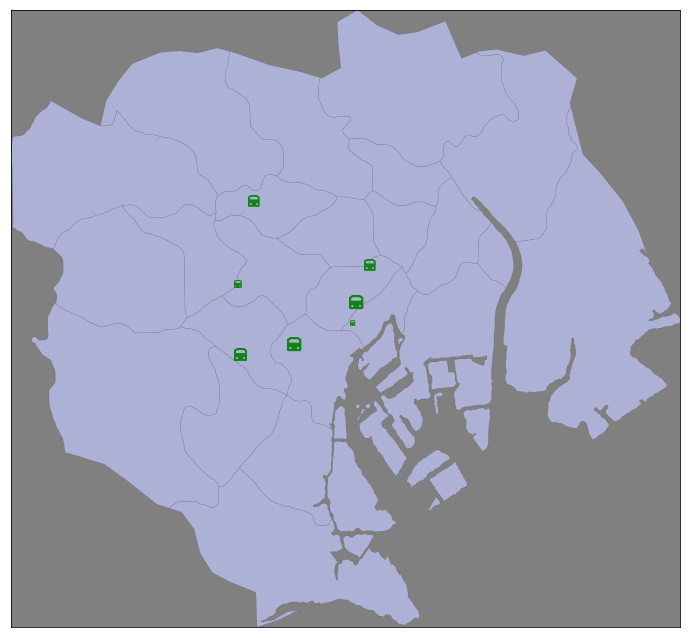

In [48]:
fig,ax = plt.subplots(figsize=(12,12))
ax = mpoint.prepare_map(ax, map_context=borders, background_colour='grey')
ax = mpoly.map_shape(borders, ax, lw=.1, alpha=.7, fc='#c1c6fc')
ax = mpoint.map_size(stations, 'size2', ax, extend_context=False, 
                        marker=rail_icon, facecolor='green', alpha=.9)

Actually, this can also be done by using size_scale=20. (default to 1.).

But, note that the column is 'DistanceBe2', which is a column of numberic numbers, unlike the original column which is a string. 

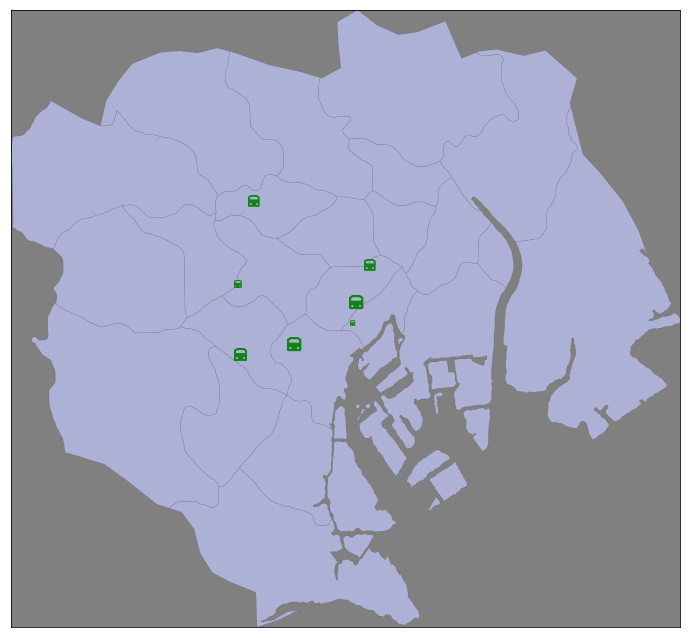

In [51]:
fig,ax = plt.subplots(figsize=(12,12))
ax = mpoint.prepare_map(ax, map_context=borders, background_colour='grey')
ax = mpoly.map_shape(borders, ax, lw=.1, alpha=.7, fc='#c1c6fc')
ax = mpoint.map_size(stations, 'DistanceBe2', ax, extend_context=False, size_scale=20.,
                        marker=rail_icon, facecolor='green', alpha=.9)

This is the end of the tutorial. 

Most of the frequently used functions for mapping points were covered. 

There are another tutorial (part 2) is for mapping the sequence, that include breaking,colouring,sizing of the points automatically according to a column of sequences. 